## 5. Análises do mercado financeiro

### 5.1. Que análises são essas?

Fazendo algumas análises básicas

Utilizando ferramentas de dados e de visualização, explorando os dados para obter insights. Mostrando alguns exemplos da aplicação do Python no mercado financeiro.

Realizando análise exploratória dos dados, calculando métricas importantes no mercado financeiro, como retorno, volatividade, drawdown, distribuições, skewness, dentre outras.

### 5.2 Obtençao dos dados

Utilizando a biblioteca yfinance, vamos obter os dados de negociação para algum papel, como por exemplo PETR4

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 exemplo pode-se utilizar ações , FIIs, ETFs, BDRs, etc.

[*********************100%***********************]  1 of 1 completed


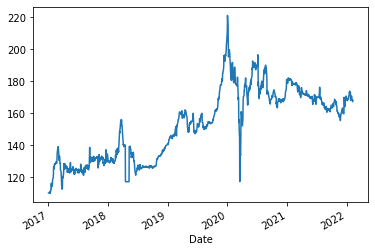

In [2]:
# usando fundos imobiliários 

yf.download('HGLG11.SA', start='2017-01-01', end='2022-02-10').Close.plot()

In [3]:
petro = yf.download('PETR4.SA', start='2017-01-01', end='2022-02-10')

[*********************100%***********************]  1 of 1 completed


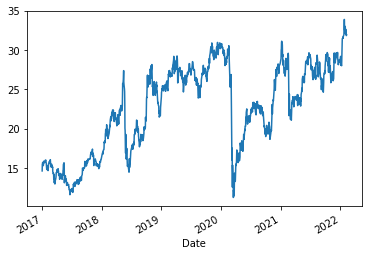

In [4]:
petro.Close.plot()

## 5.3. Médias móveis

### 5.3.1 O que são médias móveis ?

Porque elas são tão importantes no mercado financeiro?

Algumas métricas com as quais podemos criar médias móveis: preço, retorno, volatividade, drawdown

### 5.3.2 Médias móveis do preço

In [5]:
petro.Close.head(10)

Date
2017-01-02    14.66
2017-01-03    15.50
2017-01-04    15.50
2017-01-05    15.75
2017-01-06    15.66
2017-01-09    15.33
2017-01-10    15.48
2017-01-11    15.66
2017-01-12    15.90
2017-01-13    15.68
Name: Close, dtype: float64

In [6]:
# calculando a média movel de 5 periodos
# 15.414000 é a média dos 5 periodos anteriores

petro.Close.rolling(5).mean()

Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06    15.414000
                ...    
2022-02-03    32.496000
2022-02-04    32.514000
2022-02-07    32.474001
2022-02-08    32.240001
2022-02-09    32.126001
Name: Close, Length: 1271, dtype: float64

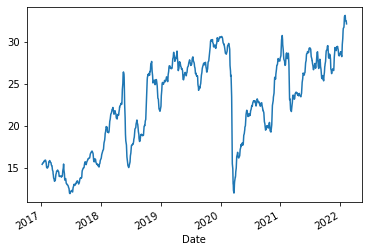

In [7]:
petro.Close.rolling(5).mean().plot()

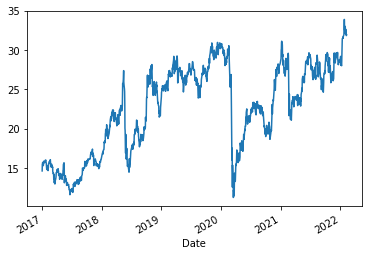

In [8]:
petro.Close.plot()

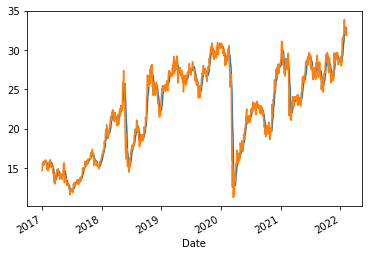

In [9]:
petro.Close.rolling(10).mean().plot()
petro.Close.plot()

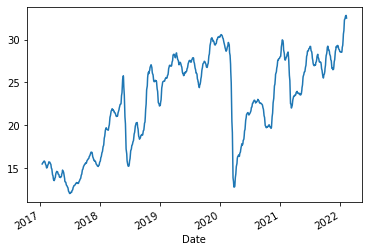

In [10]:
petro.Close.rolling(10).mean().plot()


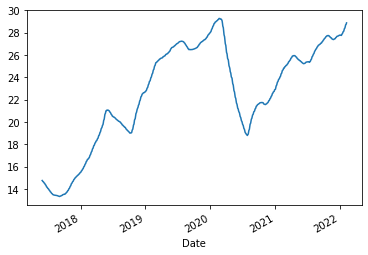

In [11]:
petro.Close.rolling(100).mean().plot()


### 5.4 Retornos diários

In [12]:
petro.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,14.64,14.70,14.60,14.66,9.067220,7525700
2017-01-03,14.95,15.65,14.95,15.50,9.586760,39947800
2017-01-04,15.45,15.68,15.31,15.50,9.586760,37071700
2017-01-05,15.70,15.91,15.62,15.75,9.741385,47586300
2017-01-06,15.78,15.92,15.50,15.66,9.685719,25592000


Calculando os retornos diários 

In [13]:
petro['Adj Close'].pct_change()

Date
2017-01-02         NaN
2017-01-03    0.057299
2017-01-04    0.000000
2017-01-05    0.016129
2017-01-06   -0.005714
                ...   
2022-02-03   -0.013838
2022-02-04    0.017462
2022-02-07   -0.014710
2022-02-08   -0.009953
2022-02-09    0.003770
Name: Adj Close, Length: 1271, dtype: float64

In [15]:
retornos = pd.DataFrame(petro['Adj Close'].pct_change())

In [16]:
retornos

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,0.057299
2017-01-04,0.000000
2017-01-05,0.016129
2017-01-06,-0.005714
...,...
2022-02-03,-0.013838
2022-02-04,0.017462
2022-02-07,-0.014710


Gráficos dos retornos diários

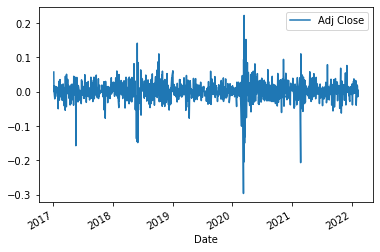

In [17]:
retornos.plot()

Retorno diário médio

In [18]:
retornos.mean()

Adj Close    0.001297
dtype: float64

Média móvel dos retornos

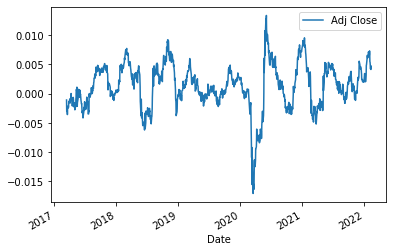

In [20]:
retornos.rolling(50).mean().plot()

### 5.5 Volatividade

A medida mais básica de volatividade que pode ter é o desvio padrão

Calculando o desvio padrão dos retornos diários

In [22]:
# volatilidade de PETR4 no período

retornos.std()

Adj Close    0.029894
dtype: float64

Visualizar a volatilidade em janelas de tempo, isto é, o comportamento da volatilidade de PETR4 ao longo de períodos especificos de tempo, por exemplo, 10 dias

In [26]:
janelas_vol = retornos.rolling(10).std()

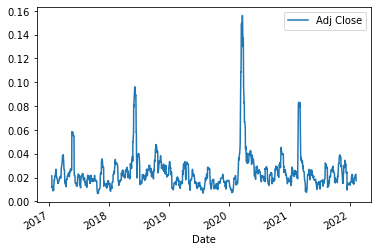

In [27]:
janelas_vol.plot()

## 5.6. Métricas estatísticas

In [28]:
# count - valores retornos ; mean - média ; std - desvio padrão
# min - valor minimo ; Quartis - 1,2, 3 e max - valor maximo
retornos.describe()

,Adj Close
count,1270.000000
mean,0.001297
std,0.029894
min,-0.296978
25%,-0.012087
50%,0.001133
75%,0.014859
max,0.222222


## 5.7. Distribuição dos retornos 

Forma de entender onde os retornos se 'concentram' com o tempo

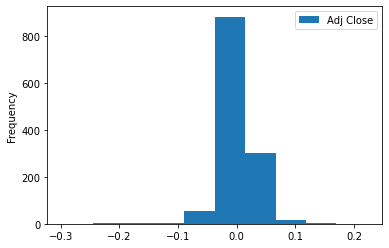

In [30]:
retornos.plot.hist()

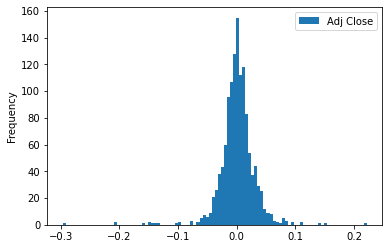

In [31]:
retornos.plot.hist(bins = 100);

## 5.8. Drawdown em janelas de 30 dias

In [33]:
dd_30 = retornos.rolling(30).min()

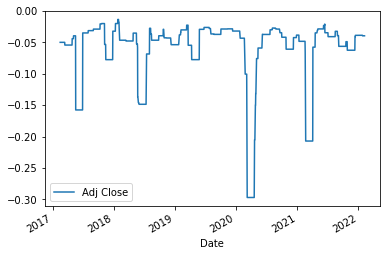

In [34]:
dd_30.plot();

## 5.9. Métricas de retorno acumulado

In [38]:
ret_acum = (retornos + 1).cumprod()
ret_acum

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.068213
...,...
2022-02-03,2.901195
2022-02-04,2.951855
2022-02-07,2.908432


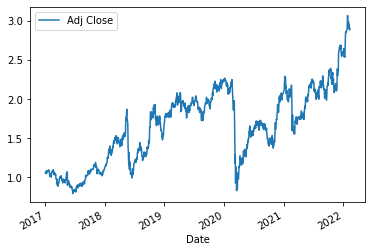

In [39]:
ret_acum.plot()

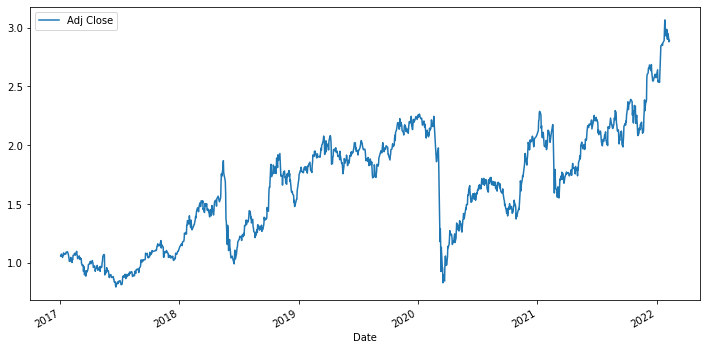

In [40]:
ret_acum.plot(figsize = (12,6))

# Cumulativo máximo, ou seja, os picos atingidos ao longo do tempo

In [41]:
picos = ret_acum.cummax()
picos

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.074352
...,...
2022-02-03,3.064935
2022-02-04,3.064935
2022-02-07,3.064935


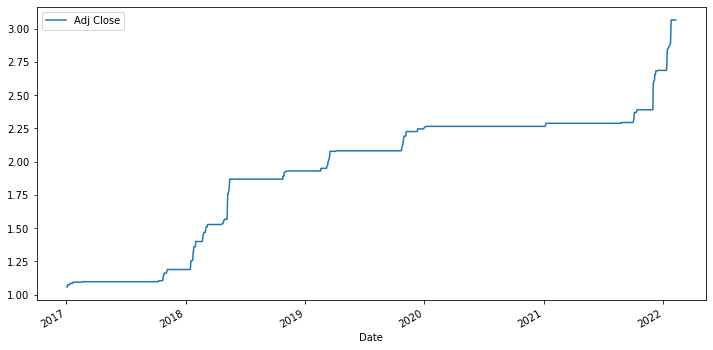

In [42]:
picos.plot(figsize = (12,6))

### Drawdown

Forma alternativa de cálculo do drawdown, considerando a diferença entre o retorno acumulado e os picos.

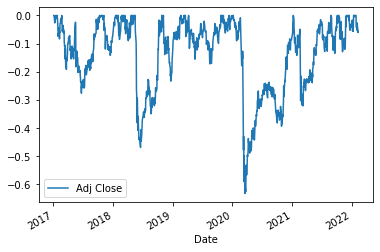

In [43]:
drawdown = (ret_acum - picos)/picos
drawdown.plot()

Qual o drawdown máximo? É justamente o valor mais 'fundo' que o gráfico acima atinge

In [45]:
max_ddw = drawdown.min()

In [46]:
# Mostra a queda que ocorreu no periodo 

max_ddw*100

Adj Close   -63.356059
dtype: float64

In [47]:
retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos
retornos['Drawdowns'] = drawdown

In [48]:
retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdowns
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.057299,1.057299,1.057299,0.000000
2017-01-04,0.000000,1.057299,1.057299,0.000000
2017-01-05,0.016129,1.074352,1.074352,0.000000
2017-01-06,-0.005714,1.068213,1.074352,-0.005714


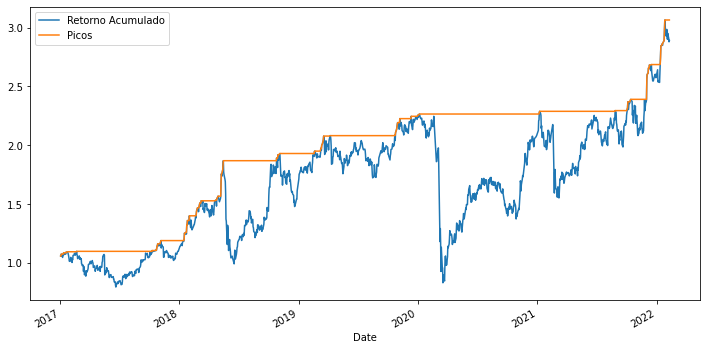

In [50]:
retornos[['Retorno Acumulado', 'Picos']].plot(figsize = (12,6))

## 5.10 Normalização

Para explilcar o conceito de normalização, vamos obter dados de vários papéis ao mesmo tempo para ficar mais fácil de exemplificar

In [58]:
acoes = ['PETR4.SA','WEGE3.SA', 'MGLU3.SA', 'VALE3.SA', 'BPAC11.SA','LREN3.SA','OIBR3.SA']

In [59]:
data =yf.download(acoes, start='2019-01-01', end='2022-05-10')['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [60]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106979,5.641579,1.26,15.524000,39.107300,8.597387
2019-01-03,6.012529,36.638348,5.581216,1.41,15.904680,37.507488,8.793437
2019-01-04,6.225854,35.232460,5.411353,1.41,15.949847,39.949306,8.893850
2019-01-07,6.353386,34.422997,5.495374,1.42,16.201483,39.734982,8.755181
2019-01-08,6.235074,35.530666,5.451089,1.38,16.104698,40.117706,8.683456


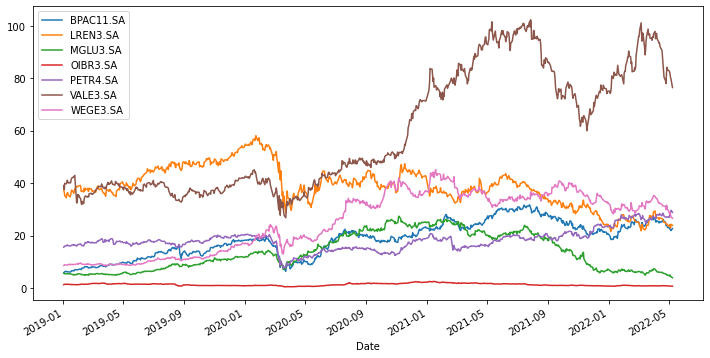

In [61]:
data.plot(figsize = (12,6))

Observe que é 'injusto' realizar uma comparação de um papel numa magnitude mais alta com outros que possuem o preço menor.

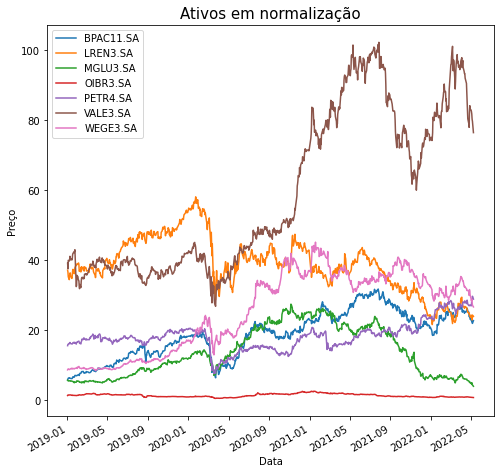

In [62]:
data.plot(figsize = (8,8))
plt.title('Ativos em normalização', fontsize = 15 )
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## Introduzindo conceito da normalização

In [63]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106979,5.641579,1.26,15.524000,39.107300,8.597387
2019-01-03,6.012529,36.638348,5.581216,1.41,15.904680,37.507488,8.793437
2019-01-04,6.225854,35.232460,5.411353,1.41,15.949847,39.949306,8.893850
2019-01-07,6.353386,34.422997,5.495374,1.42,16.201483,39.734982,8.755181
2019-01-08,6.235074,35.530666,5.451089,1.38,16.104698,40.117706,8.683456


In [64]:
data.iloc[0]

BPAC11.SA     5.773697
LREN3.SA     37.106979
MGLU3.SA      5.641579
OIBR3.SA      1.260000
PETR4.SA     15.524000
VALE3.SA     39.107300
WEGE3.SA      8.597387
Name: 2019-01-02 00:00:00, dtype: float64

In [67]:
# ativos começando em 1
normalizado = data/data.iloc[0]

In [66]:
# ativo começando em 100
(data/data.iloc[0])*100

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-01-03,104.136552,98.737079,98.930037,111.904760,102.452204,95.909174,102.280340
2019-01-04,107.831334,94.948338,95.919129,111.904760,102.743153,102.153068,103.448292
2019-01-07,110.040171,92.766906,97.408448,112.698410,104.364098,101.605024,101.835372
2019-01-08,107.991009,95.751977,96.623467,109.523810,103.740647,102.583677,101.001108
...,...,...,...,...,...,...,...
2022-05-03,392.123102,63.384304,81.537459,60.317460,174.859612,210.958057,329.908550
2022-05-04,398.704692,65.378537,87.741395,60.317460,185.380082,209.193675,336.063128
2022-05-05,383.116766,61.632613,78.346866,60.317460,185.033248,205.409226,327.005438


In [68]:
normalizado.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.041366,0.987371,0.989300,1.119048,1.024522,0.959092,1.022803
2019-01-04,1.078313,0.949483,0.959191,1.119048,1.027432,1.021531,1.034483
2019-01-07,1.100402,0.927669,0.974084,1.126984,1.043641,1.016050,1.018354
2019-01-08,1.079910,0.957520,0.966235,1.095238,1.037406,1.025837,1.010011


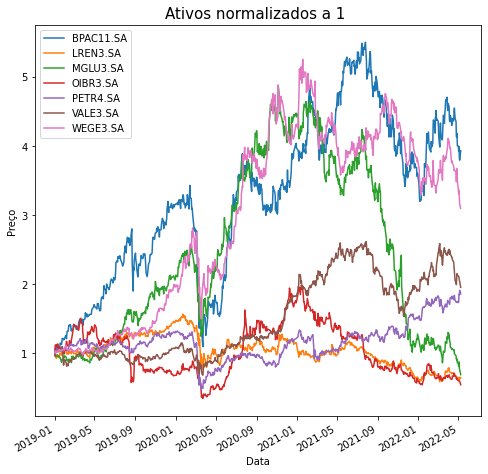

In [70]:
normalizado.plot(figsize = (8,8))
plt.title('Ativos normalizados a 1 ', fontsize = 15 )
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## 5.1 Plot de cotação com volume

Vamos extrair dados para um ativo só

In [71]:
lren = yf.download('LREN3.SA', start ='2017-01-01', end = '2022-05-15')

[*********************100%***********************]  1 of 1 completed


In [74]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484772,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021252,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862577,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696341,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492331,2139141


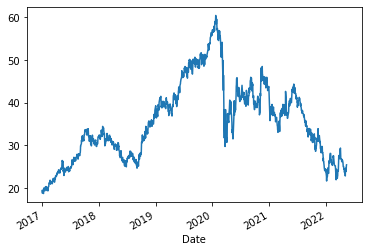

In [75]:
lren.Close.plot()

Text(0.5, 1.0, 'Fechamento | Volume | Cotação de LREN3')

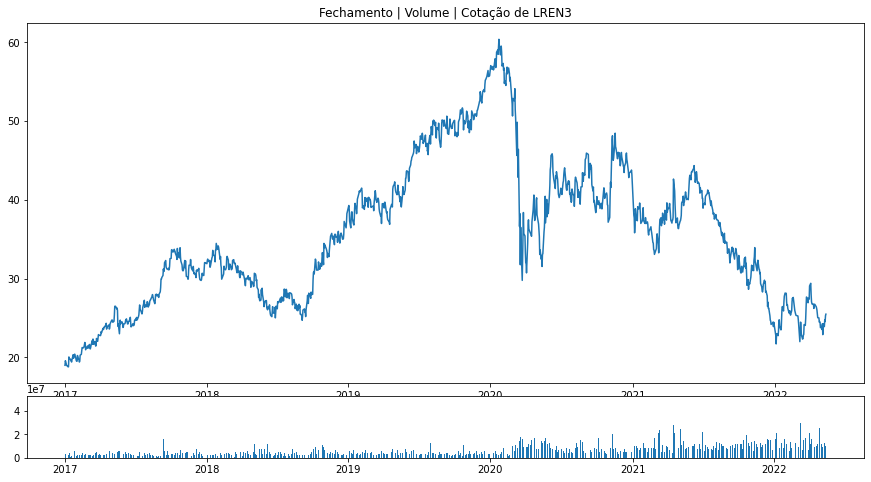

In [79]:
fig = plt.figure(figsize = (15,8))       # figura
gs = fig.add_gridspec(nrows = 6, ncols =1)  # divide em linha e colunas
ax1 = fig.add_subplot(gs[0:5, 0])     # informação de contação
ax2 = fig.add_subplot(gs[5, 0])       # informação de volume

ax1.plot(lren.Close)  # plot do fechamento 
ax2.bar(lren.index, lren.Volume)   # Plot informação de volume
ax1.set_title('Fechamento | Volume | Cotação de LREN3') # titulo do gráfico


# Exercício

Criar uma função que recebe um papel determinado pelo usuário(sem.SA) e cria um plot de cotação e volume, com  dimensões e datas (início e fim) também especificadas pelo usuário.

In [81]:
# exemplo 
papel = 'PETR4'
f'{papel}'

'PETR4'

In [84]:
tamanho = (15,8)

In [85]:
def plota_cotacao_volume(papel, tamanho, inicio, fim):
    dados = yf.download(papel + '.SA', start = inicio , end = fim)
    fig = plt.figure(figsize = tamanho)       
    gs = fig.add_gridspec(nrows = 6, ncols =1) 
    ax1 = fig.add_subplot(gs[0:5, 0])     
    ax2 = fig.add_subplot(gs[5, 0])       

    ax1.plot(dados.Close) 
    ax2.bar(dados.index, dados.Volume)  

    # O título do gráfico precisa ser adaptável ao papel determinado pelos usuários
    ax1.set_title(f'Fechamento | Volume | Cotação de {papel}') 

[*********************100%***********************]  1 of 1 completed


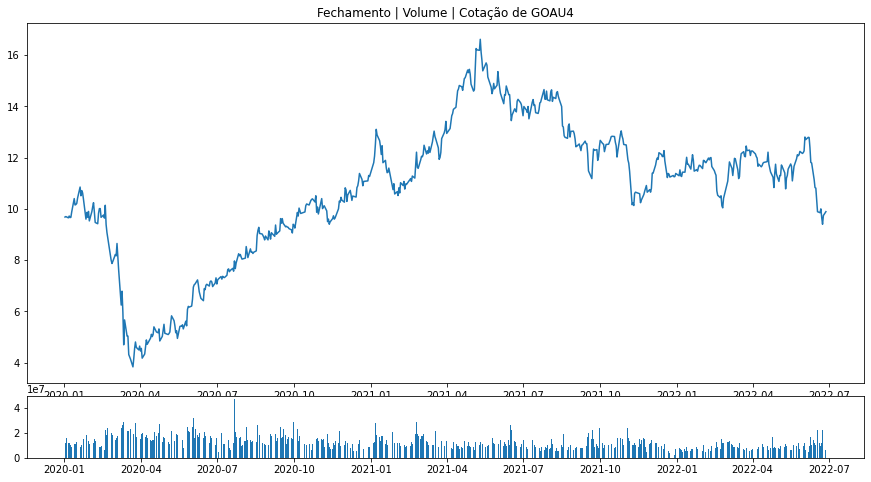

In [87]:
plota_cotacao_volume('GOAU4', tamanho, '2020-01-01', '2022-06-28')